# 1. Análise exploratória de dados


#### a. Carregue a base de dados media_precos_carros_brasil.csv

In [166]:
# importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Métricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings('ignore')

In [167]:
# Carregando dados do arquivo precos_carros_brasil
dados = pd.read_csv('precos_carros_brasil.csv')

In [168]:
# Listando o nome das colunas
dados.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')

In [169]:
# Imprimindo somente as cinco primeiras linhas
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [170]:
# Imprime o tipo de dado de cada coluna
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [171]:
# Imprimindo o tipo de dado de cada coluna após conversões
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [172]:
# Número de linhas e colunas
dados.shape

(267542, 11)

---

#### b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes

In [173]:
# verificando se há valores faltantes nos dados
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [174]:
# verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

pelo o resultado é possível supor que pode haver um grande número de linhas inteiramente vazias

In [175]:
# verificando se há linhas inteiramente vazias e quantas existem
dados.isnull().all(axis=1).sum()

65245

In [176]:
# Removendo todas as linhas que teem em todos os seus campos valores faltantes
dados.dropna(axis=0, how='all', inplace=True)

In [177]:
# Após correções, verificando novamente se há linhas inteiramente vazias e quantas existem
dados.isnull().all(axis=1).sum()

0

In [178]:
# Após correções, verificando novamente a quantidade de valores faltantes por coluna
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

---

#### c. Verifique se há dados duplicados nos dados

In [179]:
# Verificando se há dados duplicados
dados.duplicated().sum()

2

In [180]:
# Removendo dados duplicados
dados.drop_duplicates(inplace=True)

In [181]:
# Verificando se ainda há dados duplicados após remoção dos dados duplicados
dados.duplicated().sum()

0

---

#### d. Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [182]:
# Convertendo engine_size, year_of_reference, year_model e avg_price_brl de object para numerics
dados['engine_size'] = dados['engine_size'].str.replace(',', '.').astype(float)
dados['year_of_reference'] = pd.to_numeric(dados['year_of_reference'], errors='coerce').astype('Int64')
dados['year_model'] = pd.to_numeric(dados['year_model'], errors='coerce').astype('Int64')
dados['avg_price_brl'] = pd.to_numeric(dados['avg_price_brl'], errors='coerce')

In [183]:
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [184]:
# Imprimindo alguns valores de medidas de tendências centrais
dados[numericas_cols].describe()

,year_of_reference,engine_size,year_model,avg_price_brl
count,202295.0,202295.000000,202295.0,202295.000000
mean,2021.564695,1.822302,2011.271514,52756.765713
std,0.571904,0.734432,6.376241,51628.912116
min,2021.0,1.000000,2000.0,6647.000000
25%,2021.0,1.400000,2006.0,22855.000000
50%,2022.0,1.600000,2012.0,38027.000000
75%,2022.0,2.000000,2016.0,64064.000000
max,2023.0,6.200000,2023.0,979358.000000


In [185]:
# Imprimindo resumos de variáveis categóricas - estatística descritiva
dados[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear
count,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual
freq,24260,425,1,44962,425,168684,161883


e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)

In [186]:
# Imprimir quantidade de carros por modelo
dados['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [187]:
# Imprimir quantidade de carros por marca
dados['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

---
---
# 2. Visualização de dados

#### a. Gere um gráfico da distribuição da quantidade de carros por marca

In [188]:
# Determinar a quantidade de elementos para cada marca de carro
dados['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

[Text(0, 0, '44962.0'),
 Text(0, 0, '44312.0'),
 Text(0, 0, '38590.0'),
 Text(0, 0, '33150.0'),
 Text(0, 0, '29191.0'),
 Text(0, 0, '12090.0')]

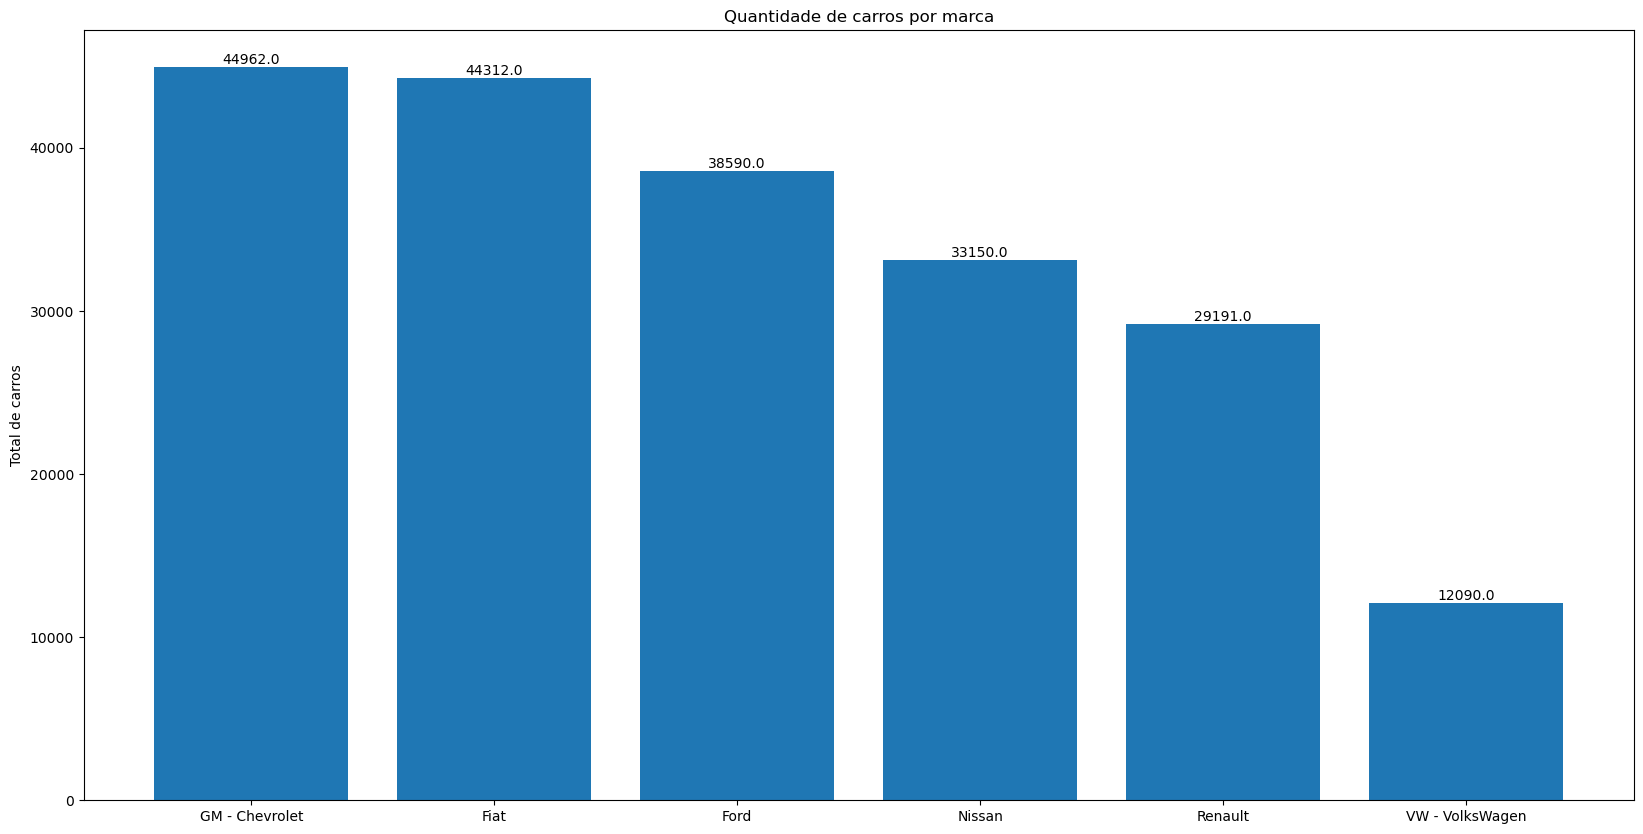

In [189]:
# Gráfico da distribuição da quantidade de carros por marca
plt.figure(figsize=(20,10)) # Tamanho da imagem do gráfico
grafic_brands_qties = plt.bar(dados['brand'].unique(), dados['brand'].value_counts()) # gráfico de barras - eixos X e Y
plt.title('Quantidade de carros por marca') # inserir título no gráfico
plt.ylabel('Total de carros') # inserir rótulo no eixo Y
plt.bar_label(grafic_brands_qties, size=10, fmt="%.01f", label_type='edge')

---

#### b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro


In [190]:
# Determinar a quantidade de carros para cada tipo de engrenagem do carro (câmbio)
dados['gear'].value_counts()

gear
manual       161883
automatic     40412
Name: count, dtype: int64

[Text(0, 0, '161883.0'), Text(0, 0, '40412.0')]

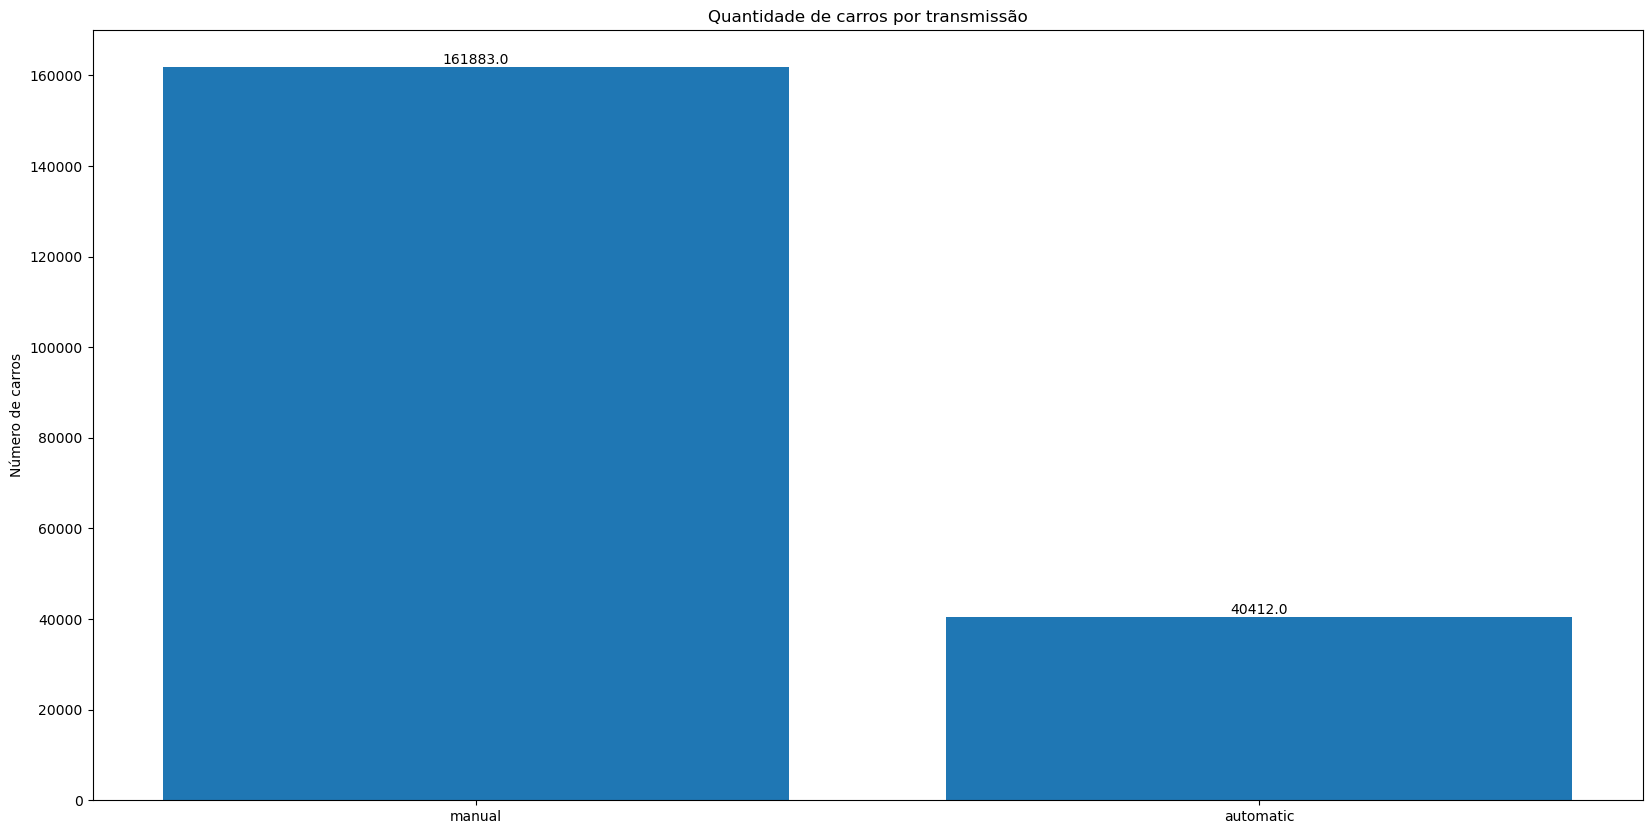

In [191]:
# Gráfico da distribuição de carros por tipo de engrenagem de carro (câmbio)
plt.figure(figsize=(20,10)) # Tamanho da imagem do gráfico
grafic_gear_qties = plt.bar(dados['gear'].unique(), dados['gear'].value_counts()) # gráfico de barras - eixos X e Y
plt.title('Quantidade de carros por transmissão') # inserir título no gráfico
plt.ylabel('Número de carros') # inserir rótulo no eixo Y
plt.bar_label(grafic_gear_qties, size=10, fmt="%.01f", label_type='edge')

---

#### c.  Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

In [192]:
# Arrendondar ano de referência - remover a parte decimal
dados['year_of_reference'] = dados['year_of_reference'].round().astype(int)

In [193]:
# Obter somente carros do ano de 2022
cars_in_2022 = dados[dados['year_of_reference'] == 2022]
cars_in_2022.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
96280,2022,January,004001-0,gzw0hkct8cj4,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002,12330.0
96281,2022,January,004001-0,gm2ws5yqjnfx,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001,11408.0
96282,2022,January,004001-0,gbvgy7432kp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000,10620.0
96283,2022,January,004001-0,gvx412fg8v0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000,11992.0
96284,2022,January,004003-7,jtskpmg524fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001,17182.0


In [194]:
# Definir a ordem dos meses customizada
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [195]:
# Agrupar os preços médios dos carros em cada mês
cars_in_2022['month_of_reference'] = pd.Categorical(cars_in_2022['month_of_reference'], categories=month_order, ordered=True)
cars_avg_price_in_2022 = cars_in_2022.groupby(['month_of_reference'])['avg_price_brl'].mean().round(0)
cars_avg_price_in_2022.head()

month_of_reference
January     54840.0
February    55825.0
March       56849.0
April       57150.0
May         57800.0
Name: avg_price_brl, dtype: float64

In [196]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
cars_avg_price_in_2022 = cars_avg_price_in_2022.reset_index(name='average_price')
cars_avg_price_in_2022.head()

,month_of_reference,average_price
0,January,54840.0
1,February,55825.0
2,March,56849.0
3,April,57150.0
4,May,57800.0


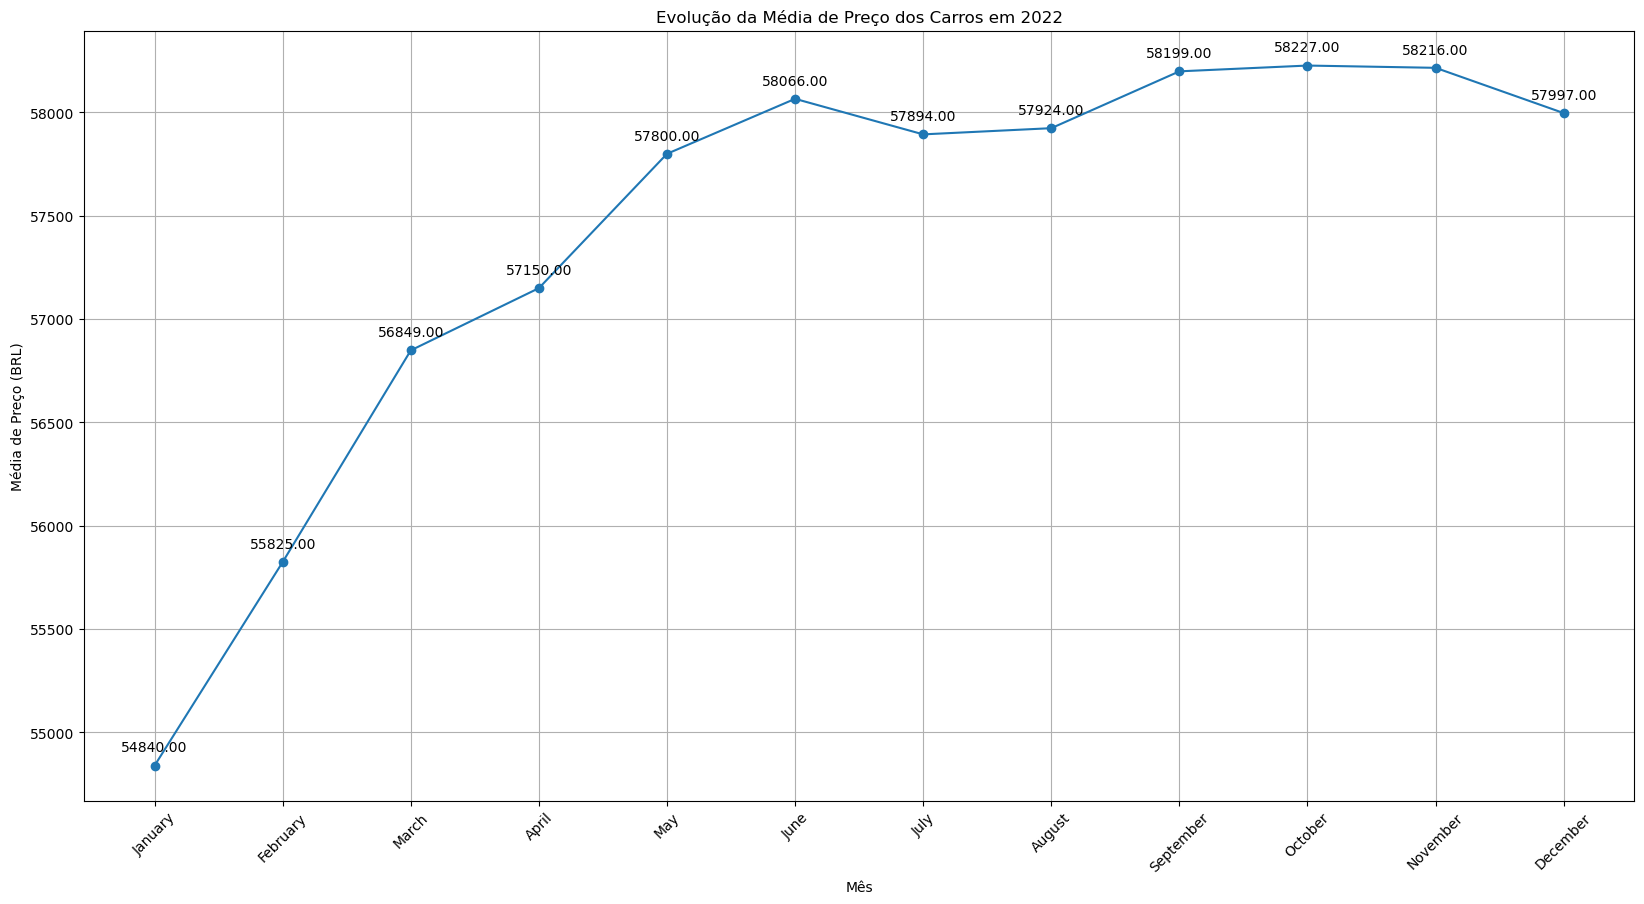

In [197]:
plt.figure(figsize=(20, 10))
# cars_avg_price_in_2022.plot(kind='line', marker='o')
plt.plot(cars_avg_price_in_2022['month_of_reference'], cars_avg_price_in_2022['average_price'], marker='o', linestyle='-')

# adiciona anotações de cada ponto ao gráfico
for x, y in zip(cars_avg_price_in_2022['month_of_reference'], cars_avg_price_in_2022['average_price']):
    label = "{:.2f}".format(y)
    plt.annotate(
      label,
      (x,y),
      textcoords="offset points",
      xytext=(0,10),
      ha='center'
    )

plt.title('Evolução da Média de Preço dos Carros em 2022')
plt.xlabel('Mês')
plt.ylabel('Média de Preço (BRL)')
plt.xticks(cars_avg_price_in_2022.index, month_order, rotation=45)
plt.grid(True)

---

#### d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

In [198]:
# Agrupar média de preços médios dos carros por marcar e tipo de engrenagem
car_gear_brand_avg_price = dados.groupby(['brand', 'gear'])['avg_price_brl'].mean().round(0)
car_gear_brand_avg_price.head()

brand           gear     
Fiat            automatic    97397.0
                manual       39694.0
Ford            automatic    84769.0
                manual       51784.0
GM - Chevrolet  automatic    88157.0
Name: avg_price_brl, dtype: float64

In [199]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
car_gear_brand_avg_price = car_gear_brand_avg_price.reset_index(name='average_price')
car_gear_brand_avg_price.head()

,brand,gear,average_price
0,Fiat,automatic,97397.0
1,Fiat,manual,39694.0
2,Ford,automatic,84769.0
3,Ford,manual,51784.0
4,GM - Chevrolet,automatic,88157.0


Text(0.5, 1.0, 'Média de preços dos carros por marca e tipo de engrenagem')

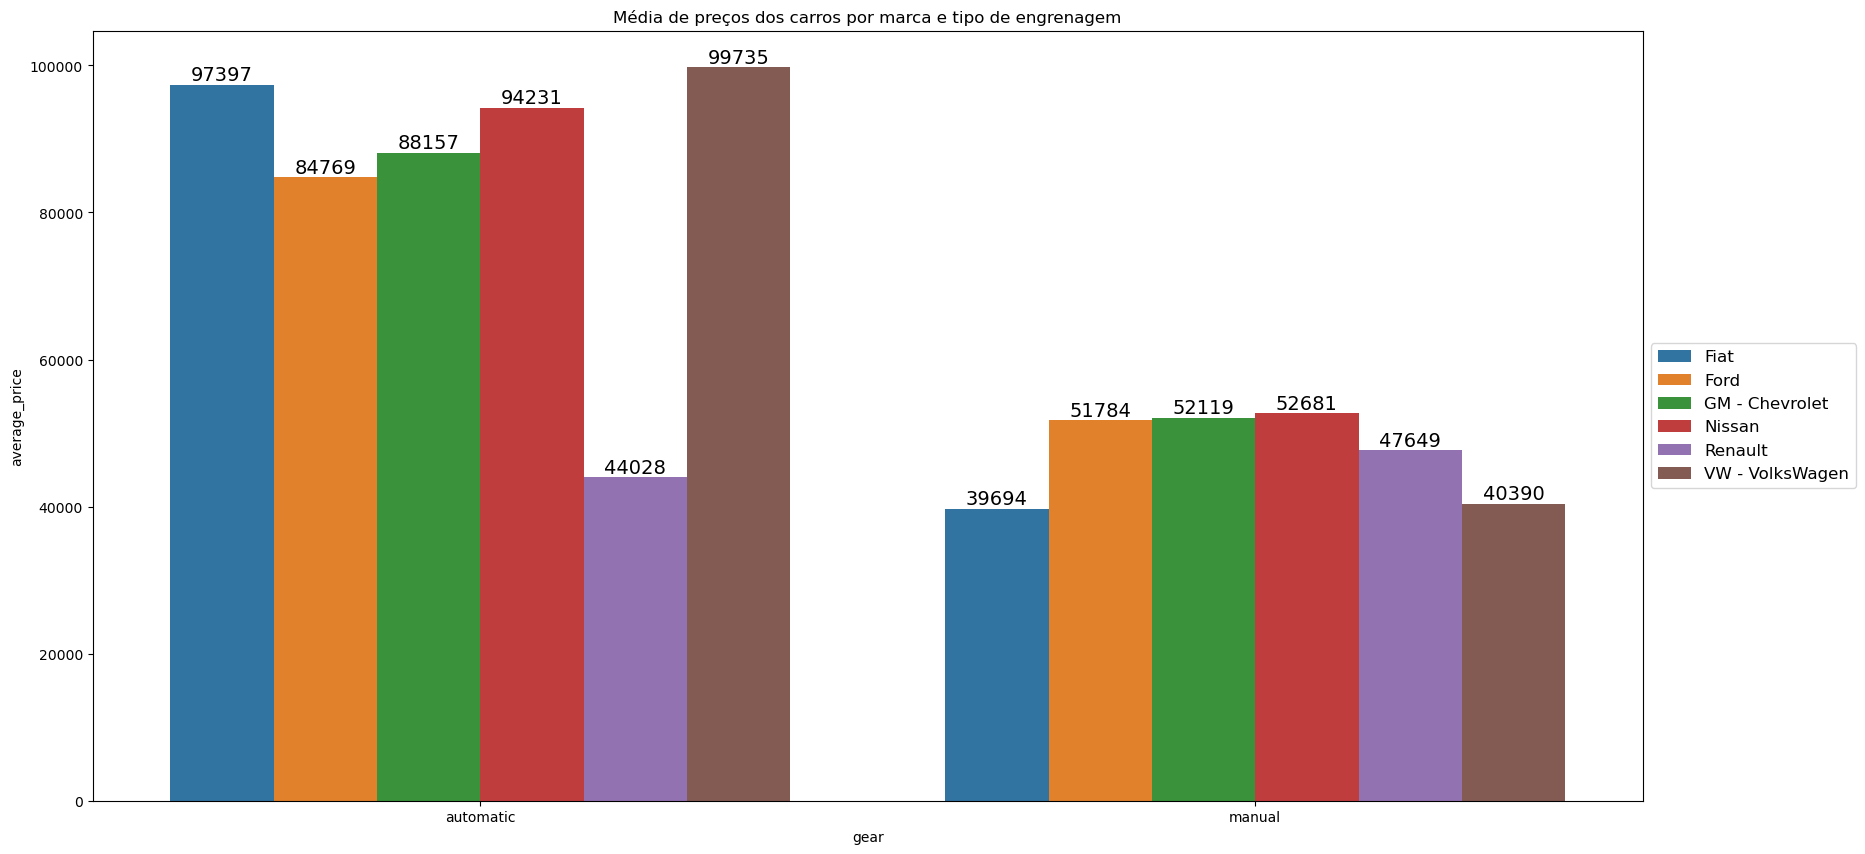

In [200]:
# Gerar o gráfico de distruibuição média dos preços dos carros por marca e tipo de engrenagem
plt.figure(figsize=(20,10))
barplot = sns.barplot(
  x='gear', 
  y='average_price', 
  hue='brand', 
  data=car_gear_brand_avg_price, 
  hue_order=car_gear_brand_avg_price['brand'].unique(),
)
barplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=12)

barplot.bar_label(barplot.containers[0], fontsize=14);
barplot.bar_label(barplot.containers[1], fontsize=14);
barplot.bar_label(barplot.containers[2], fontsize=14);
barplot.bar_label(barplot.containers[3], fontsize=14);
barplot.bar_label(barplot.containers[4], fontsize=14);
barplot.bar_label(barplot.containers[5], fontsize=14);

plt.title('Média de preços dos carros por marca e tipo de engrenagem')

Text(0.5, 1.0, 'Média de Preços dos Carros por Marca e Tipo de engrenagem')

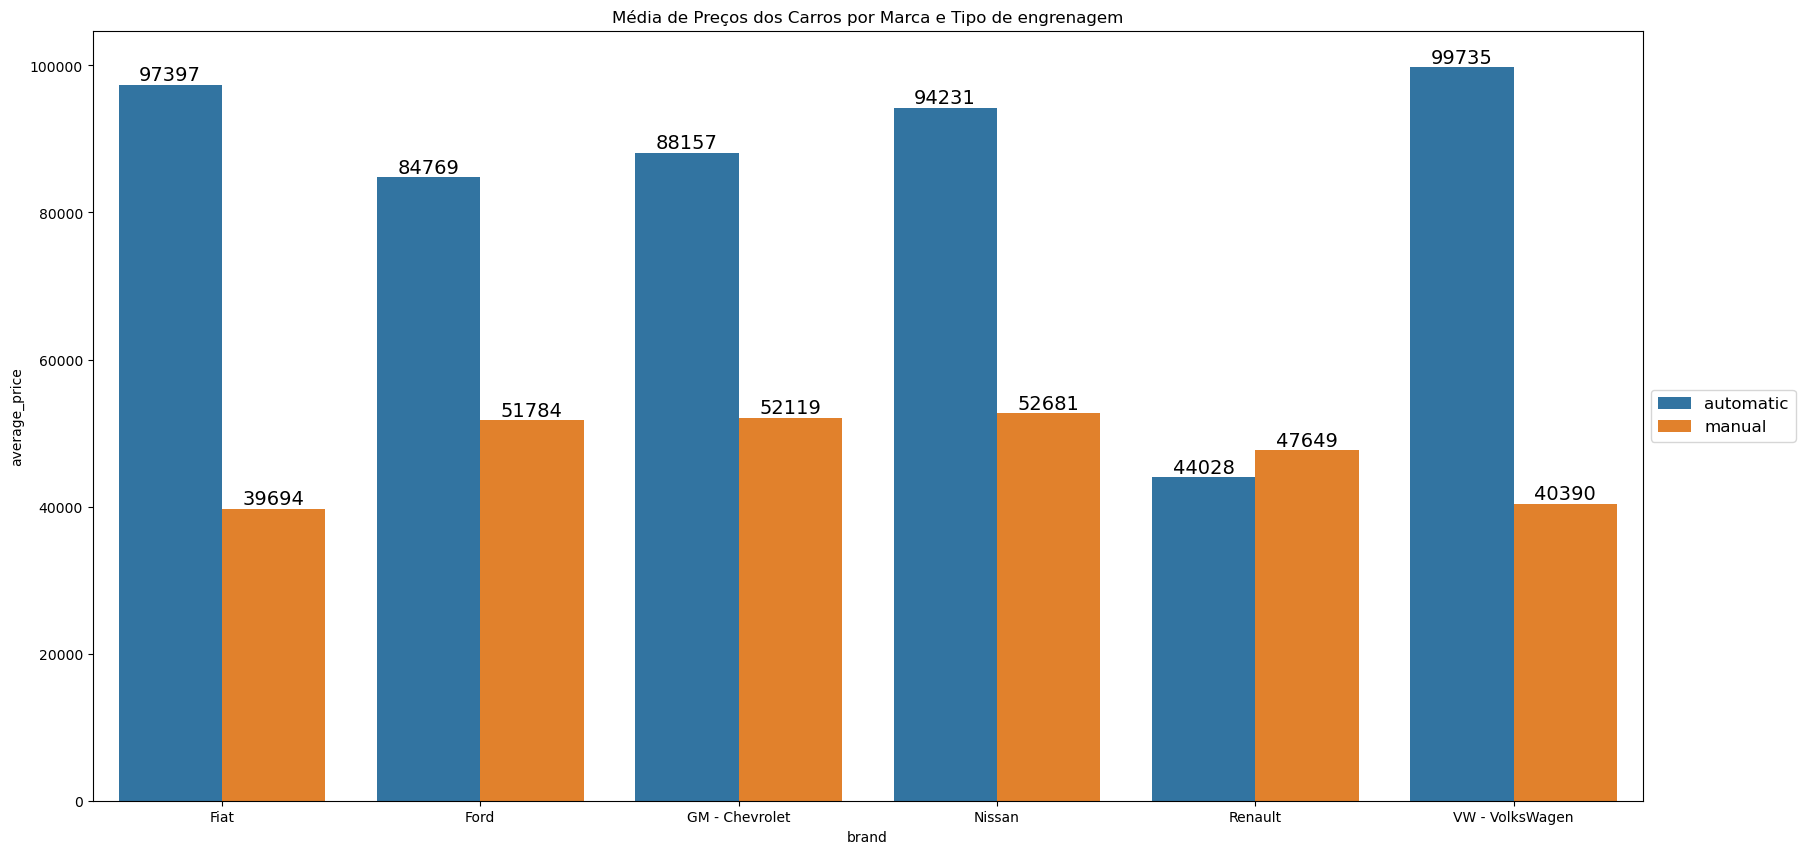

In [201]:
# Gerar o segundo tipo de gráfico de distruibuição média dos preços dos carros por marca e tipo de engrenagem
plt.figure(figsize=(20,10))
barplot = sns.barplot(
  x='brand', 
  y='average_price', 
  hue='gear', 
  data=car_gear_brand_avg_price, 
  hue_order=car_gear_brand_avg_price['gear'].unique(),
)

barplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=12)

barplot.bar_label(barplot.containers[0], fontsize=14);
barplot.bar_label(barplot.containers[1], fontsize=14);

plt.title('Média de Preços dos Carros por Marca e Tipo de engrenagem')

---

#### f. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

In [202]:
# Agrupar média de preços médios dos carros por marcar e tipo de combustível
cars_avg_price_brand_fuel = dados.groupby(['brand', 'fuel'])['avg_price_brl'].mean().round(0)
cars_avg_price_brand_fuel.head()

brand  fuel    
Fiat   Alcohol     11510.0
       Diesel      99814.0
       Gasoline    37197.0
Ford   Alcohol     10149.0
       Diesel      94526.0
Name: avg_price_brl, dtype: float64

In [203]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
cars_avg_price_brand_fuel = cars_avg_price_brand_fuel.reset_index(name='average_price')
cars_avg_price_brand_fuel.head()

,brand,fuel,average_price
0,Fiat,Alcohol,11510.0
1,Fiat,Diesel,99814.0
2,Fiat,Gasoline,37197.0
3,Ford,Alcohol,10149.0
4,Ford,Diesel,94526.0


Text(0.5, 1.0, 'Média de Preços dos Carros por Marca e Tipo de Combustível')

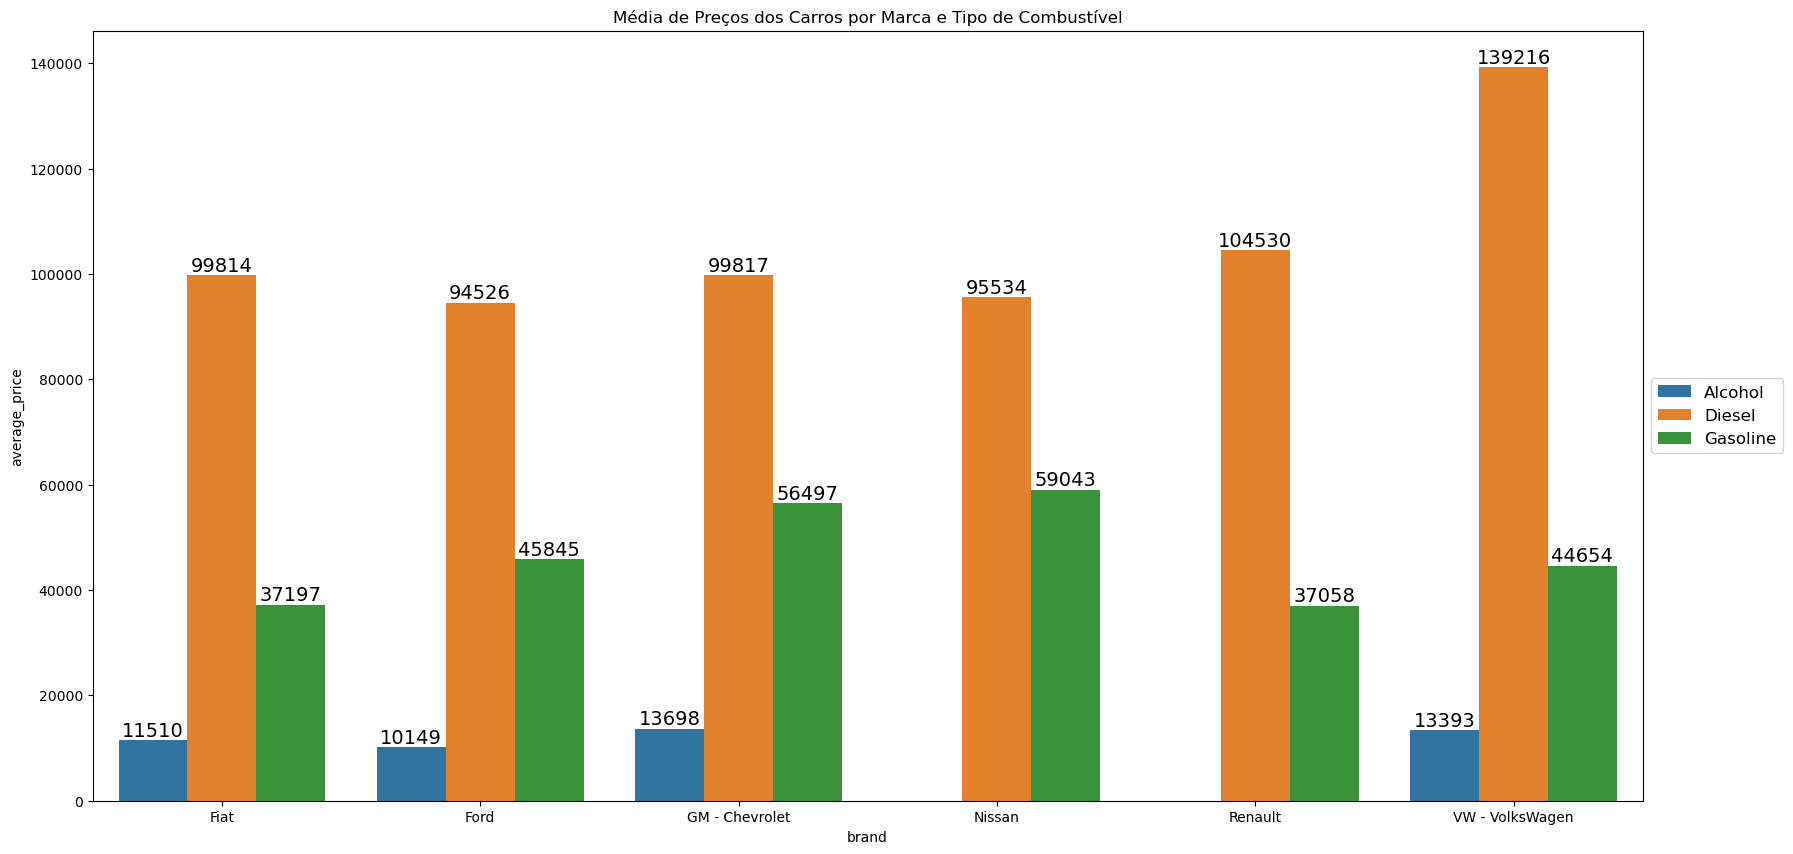

In [204]:
# Gerar gráfico de média de preços médios de carros por marcar e tipo de combustível
plt.figure(figsize=(20, 10))
barplot = sns.barplot(
  x='brand', 
  y='average_price',
  hue='fuel',
  data=cars_avg_price_brand_fuel,
  hue_order=cars_avg_price_brand_fuel['fuel'].unique()
)

barplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=12)

barplot.bar_label(barplot.containers[0], fontsize=14)
barplot.bar_label(barplot.containers[1], fontsize=14)
barplot.bar_label(barplot.containers[2], fontsize=14)

plt.title('Média de Preços dos Carros por Marca e Tipo de Combustível')

Text(0.5, 1.0, 'Média de Preços dos Carros por Marca e Tipo de Combustível')

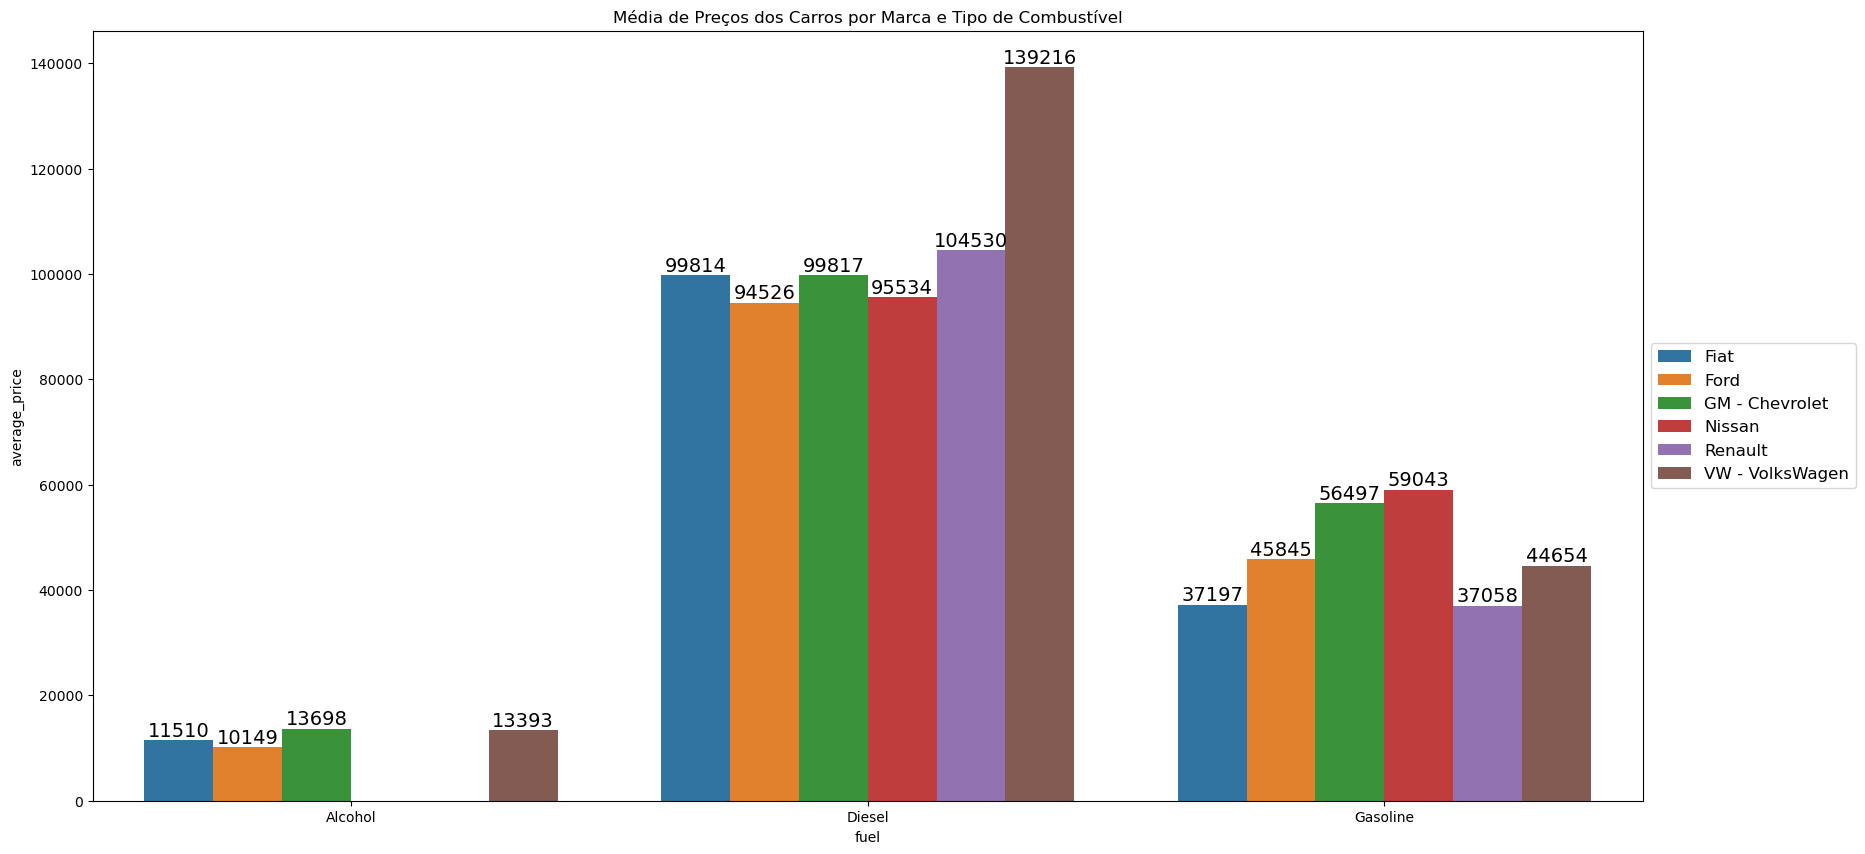

In [205]:
# Gerar gráfico de média de preços médios de carros por marcar e tipo de combustível - Segundo tipo
plt.figure(figsize=(20, 10))
barplot = sns.barplot(
  x='fuel', 
  y='average_price',
  hue='brand',
  data=cars_avg_price_brand_fuel,
  hue_order=cars_avg_price_brand_fuel['brand'].unique()
)

barplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=12)

barplot.bar_label(barplot.containers[0], fontsize=14)
barplot.bar_label(barplot.containers[1], fontsize=14)
barplot.bar_label(barplot.containers[2], fontsize=14)
barplot.bar_label(barplot.containers[3], fontsize=14)
barplot.bar_label(barplot.containers[4], fontsize=14)
barplot.bar_label(barplot.containers[5], fontsize=14)

plt.title('Média de Preços dos Carros por Marca e Tipo de Combustível')

---
---
#### 3. Aplicação de modelos de machine learning para prever o preço médio dos carros 

a. Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002,9162.0
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001,8832.0
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000,8388.0
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000,8453.0
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001,12525.0


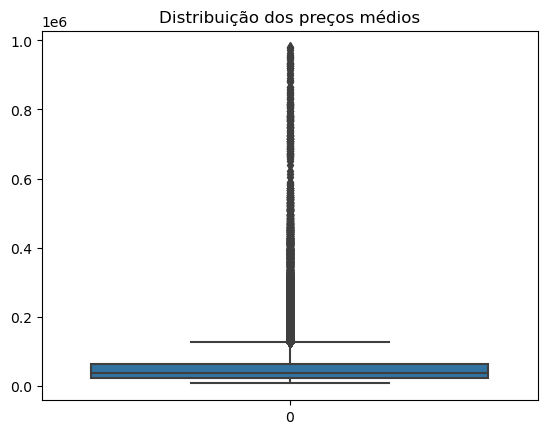

In [206]:
# Gráfico de distribuição boxplot dos preços médios dos carros 
sns.boxplot(dados['avg_price_brl']).set_title('Distribuição dos preços médios')
dados.head()

In [207]:
# Transformar mês de referência em uma variável numérica

dados['month_of_reference'] = LabelEncoder().fit_transform(dados['month_of_reference']) 
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002,9162.0
1,2021,4,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001,8832.0
2,2021,4,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000,8388.0
3,2021,4,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000,8453.0
4,2021,4,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001,12525.0


In [208]:
# Transformar marca de carro em uma variável numérica
dados['brand'] = LabelEncoder().fit_transform(dados['brand'])
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,004001-0,cfzlctzfwrcp,2,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002,9162.0
1,2021,4,004001-0,cdqwxwpw3y2p,2,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001,8832.0
2,2021,4,004001-0,cb1t3xwwj1xp,2,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000,8388.0
3,2021,4,004001-0,cb9gct6j65r0,2,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000,8453.0
4,2021,4,004003-7,g15wg0gbz1fx,2,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001,12525.0


In [209]:
# Transformar modelo de carro em uma variável numérica
dados['model'] = LabelEncoder().fit_transform(dados['model'])
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,004001-0,cfzlctzfwrcp,2,297,Gasoline,manual,1.0,2002,9162.0
1,2021,4,004001-0,cdqwxwpw3y2p,2,297,Gasoline,manual,1.0,2001,8832.0
2,2021,4,004001-0,cb1t3xwwj1xp,2,297,Gasoline,manual,1.0,2000,8388.0
3,2021,4,004001-0,cb9gct6j65r0,2,297,Alcohol,manual,1.0,2000,8453.0
4,2021,4,004003-7,g15wg0gbz1fx,2,260,Gasoline,manual,1.6,2001,12525.0


In [210]:
# Transformar tipo de combustível em uma variável numérica
dados['fuel'] = LabelEncoder().fit_transform(dados['fuel'])
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,004001-0,cfzlctzfwrcp,2,297,2,manual,1.0,2002,9162.0
1,2021,4,004001-0,cdqwxwpw3y2p,2,297,2,manual,1.0,2001,8832.0
2,2021,4,004001-0,cb1t3xwwj1xp,2,297,2,manual,1.0,2000,8388.0
3,2021,4,004001-0,cb9gct6j65r0,2,297,0,manual,1.0,2000,8453.0
4,2021,4,004003-7,g15wg0gbz1fx,2,260,2,manual,1.6,2001,12525.0


In [211]:
# Transformar tipo de transmissão em uma variável numérica
dados['gear'] = LabelEncoder().fit_transform(dados['gear'])
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,004001-0,cfzlctzfwrcp,2,297,2,1,1.0,2002,9162.0
1,2021,4,004001-0,cdqwxwpw3y2p,2,297,2,1,1.0,2001,8832.0
2,2021,4,004001-0,cb1t3xwwj1xp,2,297,2,1,1.0,2000,8388.0
3,2021,4,004001-0,cb9gct6j65r0,2,297,0,1,1.0,2000,8453.0
4,2021,4,004003-7,g15wg0gbz1fx,2,260,2,1,1.6,2001,12525.0


In [212]:
# Remover as variáveis de entrada que não são consideradas importantes para a predição

dados_interesting = dados.drop([
  'fipe_code',
  'authentication',
  ], axis=1
)
dados_interesting.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,2,297,2,1,1.0,2002,9162.0
1,2021,4,2,297,2,1,1.0,2001,8832.0
2,2021,4,2,297,2,1,1.0,2000,8388.0
3,2021,4,2,297,0,1,1.0,2000,8453.0
4,2021,4,2,260,2,1,1.6,2001,12525.0


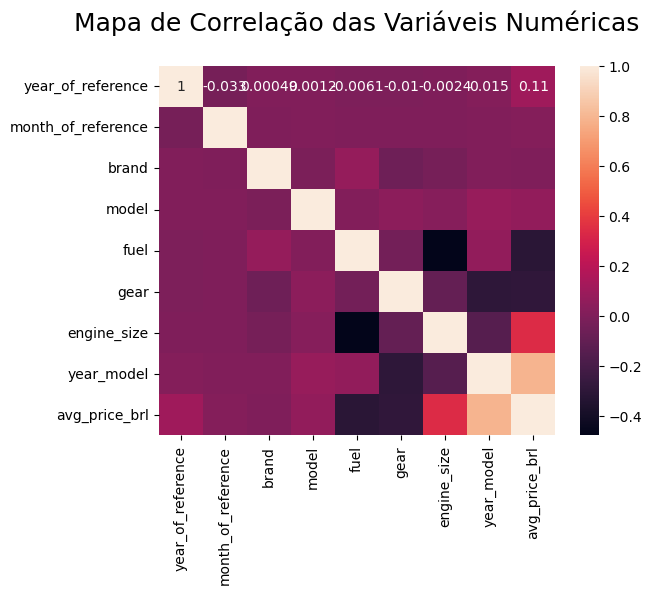

In [213]:
# Mapa de correlação das variáveis numéricas com variável Target

sns.heatmap(dados_interesting.corr("spearman"), annot = True)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 18)
plt.show()

In [214]:
# Variável X contém apenas variáveis numéricas de interesse para a análise, excluindo a variável target
X = dados_interesting.drop(['avg_price_brl'], axis=1)
X.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model
0,2021,4,2,297,2,1,1.0,2002
1,2021,4,2,297,2,1,1.0,2001
2,2021,4,2,297,2,1,1.0,2000
3,2021,4,2,297,0,1,1.0,2000
4,2021,4,2,260,2,1,1.6,2001


In [215]:
# Variável Y contém apenas a variável target - avg_price_brl
Y = dados_interesting['avg_price_brl']
Y.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

b. Crie partições contendo 75% dos dados para treino e 25% para teste

In [216]:
# Divisão: 30% dos dados são de teste e 70% de treinamento
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [217]:
# Observando os dados de treinamento
print(X_train.shape)
X_train.head(1)

(141606, 8)


,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model
100552,2022,4,1,412,2,1,1.6,2015


In [218]:
# Observando os dados de teste
print(x_test.shape)
y_test.head(1)

(60689, 8)


180633    42595.0
Name: avg_price_brl, dtype: float64

In [219]:
# Observando a variável target
y_test.head()

180633    42595.0
13130     10989.0
163315     9087.0
121464    26965.0
14044     57102.0
Name: avg_price_brl, dtype: float64

c. Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost (biblioteca XGBRegressor) para predição dos preços dos carros

Modelo Random Forest sem parametros

In [220]:
# Algoritmo Random Forest, sem especificar nenhum parâmetro (número de árvores, número de ramificações, etc)
model_rf = RandomForestRegressor()

In [221]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

Agora, testando o mesmo modelo, mas utilizando parâmetros do algoritmo Random Forest

In [222]:
# Random Forest com os hiperparametros: 
# max_depth -> profundidade máxima em cada árvore
# min_samples_leaf -> apenas folhas com determinado número mínimo de amostras
# min_samples_split -> o número mínimo necessário de amostras que um nó deve ter para ser divido (ou expandido)
# n_estimators -> o número de árvores decisão que serão criadas
# random_state -> serve para garantir a reprodutibilidade dos resultados. Controla a randomização aplicada.

model_rf_paramenters = RandomForestRegressor(
  max_depth=29,
  min_samples_leaf=32,
  min_samples_split=28,
  n_estimators=208,
  random_state=43
)

In [223]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf_paramenters.fit(X_train, Y_train)

RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28,
                      n_estimators=208, random_state=43)

Agora, usando o XGboost. Biblioteca XGBRegressor sem parametros

In [224]:
# Algoritmo XGBoost sem parametros
model_xg = XGBRegressor()

In [225]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_xg.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Agora, usando o XGBoostRegressor com os 17 parâmetros mais conhecidos

In [226]:
# learning_rate -> Taxa de aprendizado ou encolhimento do tamanho do passo usado em cada iteração de boosting para previnir o overfitting
# n_estimators -> The number of boosting rounds (trees) to be run,
# max_depth -> Maximum depth of a tree. Increasing this value makes the model more complex and can lead to overfitting,
# min_child_weight -> Minimum sum of instance weight (hessian) needed in a child. It helps control overfitting by constraining the minimum amount of samples required to split a node.,
# gamma -> Minimum loss reduction required to make a further partition on a leaf node of the tree. It acts as a regularization parameter by controlling the complexity of the trees.,
# subsample -> controls the fraction of the training data to be randomly sampled for growing trees in each boosting iteration,
# colsample_bytree -> controls the fraction of features (columns) to be randomly sampled for each tree construction,
# colsample_bynode ->  which is to control feature subsampling at different levels of the tree.,
# reg_alpha -> used to control the L1 regularization term on the weights of the features.,
# reg_lambda -> used to control the L2 regularization term on the weights of the features,
# scale_pos_weight -> is used to balance the class distribution in binary classification problems when the classes are imbalanced,
# base_score -> sets the initial prediction score of all instances. It's the global bias term that controls the global prediction,
# random_state -> that allows you to set the seed for the random number generator in XGBoost,
# objective -> specifies the learning task and the corresponding objective function to be optimized during training',
# booster -> determines the type of booster to use during the training process,
# n_jobs -> determines the number of parallel threads or processes to use during training,

# Algoritmo XGBoost com parametros
model_parameters_xg = XGBRegressor(
  learning_rate=1, 
  n_estimators=100,
  max_depth=25,
  min_child_weight=1,
  gamma=0,
  subsample=0.8,
  colsample_bytree=0.8,
  reg_alpha=0,
  reg_lambda=1,
  random_state=42,
  n_jobs=-1
)

In [227]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_parameters_xg.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=25, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

d. Grave os valores preditos em variáveis criadas

In [228]:
# Predição dos valores de preço médio dos carros com base nos dados de teste - Random Forest sem parametros
predicted_values_rf = model_rf.predict(x_test)

In [229]:
# valores preditos - Random Forest sem parametros
predicted_values_rf

array([ 42573.49,  12265.41,   8921.81, ..., 192160.98, 154610.26,
        70681.81])

In [230]:
# Predição dos valores de preço médio dos carros com base nos dados de teste - Random Forest com parametros
predicted_values_parameters_rf = model_rf_paramenters.predict(x_test)

In [231]:
# Valores preditor - Random Forest com parametros
predicted_values_parameters_rf

array([ 45182.8960844 ,  12067.12970563,  15656.70046497, ...,
       127791.60742165, 149445.50855705,  73714.11740611])

In [232]:
# Predição dos valores de preços médios dos carros com base nos dados de teste - XGBoost sem parametros
predicted_values_xg = model_xg.predict(x_test)


In [233]:
# Valores preditos - XGBoost sem parametros
predicted_values_xg

array([ 44736.773,  11302.926,   9219.962, ..., 166992.3  , 146646.44 ,
        71343.64 ], dtype=float32)

In [234]:
# Predição dos valores de preços médios dos carros com base nos dados de teste - XGBoost com parametros
predicted_values_parameters_xg = model_parameters_xg.predict(x_test)

In [235]:
# Valores preditos - XGBoost com parametros
predicted_values_parameters_xg

array([ 46773.715,  12553.754,   9538.406, ..., 191313.84 , 142505.6  ,
        72347.945], dtype=float32)

e. Realize a análise de importância das variáveis para estimar a variável target, para cada modelo treinado

In [236]:
# Análise da importancia das variáveis para estimar a variável target - Random Forest sem parametros
model_rf.feature_importances_

feature_importances_rf = pd.DataFrame(
  model_rf.feature_importances_,
  index = X_train.columns,
  columns = ['importances']
).sort_values('importances', ascending=True)

feature_importances_rf

,importances
month_of_reference,0.005211
year_of_reference,0.012454
brand,0.017942
gear,0.031927
fuel,0.032749
model,0.057739
year_model,0.388830
engine_size,0.453148


In [237]:
# Análise da importancia das variáveis para estimar a variável target - Random Forest com parametros
model_rf_paramenters.feature_importances_

feature_importances_parameters_rf = pd.DataFrame(
  model_rf_paramenters.feature_importances_,
  index = X_train.columns,
  columns = ['importances']
).sort_values('importances', ascending=True)

feature_importances_parameters_rf

,importances
month_of_reference,0.000690
year_of_reference,0.010383
brand,0.016098
gear,0.021959
fuel,0.034132
model,0.037028
year_model,0.410473
engine_size,0.469236


In [238]:
# Análise da importancia das variáveis para estimar a variável target - XGBoost com parametros
model_parameters_xg.feature_importances_

feature_importances_parameters_xg = pd.DataFrame(
  model_rf_paramenters.feature_importances_,
  index = X_train.columns,
  columns = ['importances']
).sort_values('importances', ascending=True)

feature_importances_parameters_xg

,importances
month_of_reference,0.000690
year_of_reference,0.010383
brand,0.016098
gear,0.021959
fuel,0.034132
model,0.037028
year_model,0.410473
engine_size,0.469236


In [239]:
# Analisando a importância das variáveis para estimar a variável target - XGBoost sem parametros
model_xg.feature_importances_

feature_importances_xg = pd.DataFrame(
  model_xg.feature_importances_,
  index=X_train.columns,
  columns=['importances']
).sort_values('importances', ascending=True)

feature_importances_xg

,importances
month_of_reference,0.004271
year_of_reference,0.017475
model,0.023331
brand,0.056276
gear,0.122657
fuel,0.154437
year_model,0.190992
engine_size,0.430561


As métricas de avaliação MSE, MAE e R2 para cada modelo

In [240]:
# MSE - calcula o erro quadrático médio das predições do modelo
# Random Forest sem parametro
mse_rf = mean_squared_error(y_test, predicted_values_rf)
mse_rf

12142858.8793699

In [241]:
# O MAE calcula a média da diferença absoluta entre o valor predito e o valor real
# Random Forest sem parametro
mea_rf = mean_absolute_error(y_test, predicted_values_rf)
mea_rf

1765.253413503062

In [242]:
# O R² é uma métrica que varia entre 0 e 1 e é uma razão que indica o quão bom o nosso modelo
# Random Forest sem parametros
r2_score(y_test, predicted_values_rf)

0.9954740524949698

In [243]:
# O MSE - Random Forest com parametros
mse_parameters_rf = mean_squared_error(y_test, predicted_values_parameters_rf)
mse_parameters_rf

151743671.60934204

In [244]:
# O MAE - Random Forest com parametros
mae_parameters_rf = mean_absolute_error(y_test, predicted_values_parameters_rf)
mae_parameters_rf

4577.496498615198

In [245]:
# R2 score - Random Forest com parametros
r2_score(y_test, predicted_values_parameters_rf)

0.9434413346356811

In [246]:
# MSE - XGBoost sem parametros
mse_xg = mean_squared_error(y_test, predicted_values_xg)
mse_xg

30952404.22945847

In [247]:
# MAE - XGBoost sem parametros
mae_xg = mean_absolute_error(y_test, predicted_values_xg)
mae_xg

3245.310975546176

In [248]:
# R2 score - XGBoost sem parametros
r2_score(y_test, predicted_values_xg)

0.9884632640394916

In [249]:
# MSE - XGBoost com parametros
mse_parameters_xg = mean_squared_error(y_test, predicted_values_parameters_xg)
mse_parameters_xg

58122007.144252114

In [250]:
# MAE - XGBoost com parametros
mae_parameters_xg = mean_absolute_error(y_test, predicted_values_parameters_xg)
mae_parameters_xg

3988.8141212105725

In [251]:
# R2 score - XGBoost com parametros
r2_score(y_test, predicted_values_parameters_xg)

0.9783364728327034